In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform,pdist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import gensim
import logging
from nltk.corpus import stopwords
import spacy
from spacy.lang.it.examples import sentences 
import spacy.cli
spacy.cli.download("it_core_news_sm")
import nltk
nltk.download('punkt')

✔ Download and installation successful
You can now load the model via spacy.load('it_core_news_sm')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv("cs4.csv",sep=",")

In [ ]:
df["ambito"]

0                                 Social distancing
1                   Smart services and applications
2                                 Distance Learning
3                                   Medical Imaging
4            Servizi a supporto di problemi sociali
                           ...                     
102          Servizi a supporto di problemi sociali
103                               Social distancing
104    Servizi a supporto della ricerca scientifica
105                     Prognostics and diagnostics
106                     Prognostics and diagnostics
Name: ambito, Length: 107, dtype: object

In [ ]:
idf = {}
for index , x in df.iterrows():
  for v in x["ambito"].split(","):
    try:
      idf[v] = np.append(np.array(idf[v]),index)
    except:
      z = []
      z.append(index)
      idf[v] = np.array(z)

In [ ]:
keys =  []
for key in idf.keys():
  keys.append(key)
keys

['Social distancing',
 'Smart services and applications',
 'Distance Learning',
 'Medical Imaging',
 'Servizi a supporto di problemi sociali',
 'Telemedicina',
 'Servizi a supporto di problemi economici',
 'Servizi a supporto della ricerca scientifica',
 'E-government',
 'Remote Assistive Technologies (RAT)',
 'Computational Virology and Epidemiology',
 'Thermal screening',
 'Prognostics and diagnostics',
 'Smart Working',
 'Fake news',
 'Medical Devices']

In [ ]:
from spacy.lang.it.stop_words import STOP_WORDS
nlp = spacy.load("it_core_news_sm")
def clean_text(text, filtering=True):
    list_of_cleaning_signs = ['\x0c','\n']
    for sign in list_of_cleaning_signs:
        text = text.replace(sign, ' ')
    clean_text = re.sub('[^a-zA-Zòàùèéì]+',' ',text)
    clean_text.replace("\n",'')
    clean_text = clean_text.lower()
    doc = nlp(clean_text)
    text = ""
    for token in doc:
      if (token.pos_ == 'NOUN' or token.pos_ == 'VERB' or token.pos_ == ' ADJ') and len(token.text) > 2 and token.text not in STOP_WORDS:
        text = text+ " " + token.text
    if filtering:
      return text
    else:
      return clean_text

In [ ]:
documents = []
for k in keys:
  vec = idf[k]
  text = ""
  for index in vec:
    text = text+" "+df.at[index,"obiettivi"]
  documents.append(clean_text(text.lower(),filtering=False))

In [ ]:
len(documents)

16

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
final_stopwords_list = stopwords.words('italian')
final_stopwords_list.append('https')
final_stopwords_list.append('tale')
final_stopwords_list.append('quale')
final_stopwords_list.append('fino')
final_stopwords_list.append('possibile')
final_stopwords_list.append('essere')
final_stopwords_list.append('molto')
final_stopwords_list.append('due')
final_stopwords_list.append('lombardia')
final_stopwords_list.append('lichee')
final_stopwords_list.append('line')
final_stopwords_list.append('life')
final_stopwords_list.append('legati')
final_stopwords_list.append('legata')
final_stopwords_list.append('lavorare')
final_stopwords_list.append('lavoro')
final_stopwords_list.append('lavoratore')
final_stopwords_list.append('kibi')
final_stopwords_list.append('infatti')
final_stopwords_list.append('progetto')
final_stopwords_list.append('torino')
final_stopwords_list.append('emilia')
final_stopwords_list.append('covid')
final_stopwords_list.append('quali')
final_stopwords_list.append('genova')
final_stopwords_list.append('firenze')
final_stopwords_list.append('follow')
final_stopwords_list.append('pazienti')
final_stopwords_list.append('già')
final_stopwords_list.append('virus')
final_stopwords_list.append('pisa')
final_stopwords_list.append('toscana')
final_stopwords_list.append('milano')
final_stopwords_list.append('grazie')
final_stopwords_list.append('gennaio')
final_stopwords_list.append('febbraio')
final_stopwords_list.append('marzo')
final_stopwords_list.append('aprile')
final_stopwords_list.append('maggio')
final_stopwords_list.append('giugno')
final_stopwords_list.append('luglio')
final_stopwords_list.append('agosto')
final_stopwords_list.append('settembre')
final_stopwords_list.append('ottobre')
final_stopwords_list.append('novembre')
final_stopwords_list.append('dicembre')
final_stopwords_list.append('covid')
final_stopwords_list.append('uso')
final_stopwords_list.append('obiettivo')
final_stopwords_list.append('coronavirus')
final_stopwords_list.append('università')


tfidf_vectorizer = TfidfVectorizer(max_features=5000,
                                      stop_words=final_stopwords_list,
                                      use_idf=False)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
terms = tfidf_vectorizer.get_feature_names()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
vects_words = []
vects_scores = []
for l in range (0,16):
  X=np.array(tfidf_matrix[l].indices)
  Y=np.array(tfidf_matrix[l].data)

  Z = [x for _,x in sorted(zip(Y,X),reverse=True)]
  Z_VAL = [x for x,_ in sorted(zip(Y,X),reverse=True)]
  print(Z)
  print(Z_VAL)
  #top_ids = np.argsort(np.squeeze(tfidf_matrix[0].toarray()))[::2][:1]
  top_feats = [terms[i] for i in Z]
  print(top_feats)
  vects_words.append(top_feats)
  vects_scores.append(Z_VAL)

[2229, 2973, 191, 3244, 2972, 2804, 1969, 994, 3420, 2936, 2904, 2740, 2500, 1242, 1107, 301, 220, 106, 24, 3435, 3347, 3234, 3054, 2982, 2971, 2945, 2835, 2718, 2440, 2257, 2021, 1946, 1944, 1827, 1657, 1536, 1284, 1213, 1046, 984, 958, 740, 356, 304, 286, 236, 160, 6, 3406, 3212, 3186, 3139, 3089, 3079, 3059, 2952, 2914, 2879, 2730, 2690, 2580, 2560, 2461, 2456, 2429, 2390, 2362, 2298, 2226, 2220, 2159, 2057, 2026, 1929, 1909, 1895, 1893, 1814, 1741, 1646, 1493, 1492, 1420, 1406, 1351, 1264, 1215, 1040, 1002, 989, 968, 841, 772, 606, 545, 524, 403, 371, 360, 283, 184, 173, 126, 123, 121, 11, 3469, 3464, 3460, 3440, 3438, 3422, 3421, 3417, 3403, 3400, 3384, 3377, 3366, 3358, 3357, 3351, 3350, 3342, 3308, 3299, 3298, 3297, 3290, 3284, 3277, 3262, 3256, 3253, 3247, 3227, 3225, 3215, 3214, 3213, 3207, 3203, 3193, 3187, 3180, 3178, 3174, 3161, 3159, 3155, 3138, 3106, 3086, 3073, 3055, 3048, 3043, 3041, 3040, 3039, 3024, 3019, 3012, 3004, 2996, 2994, 2985, 2979, 2978, 2961, 2951, 2939, 293

In [ ]:
dizionario = []
final_list=[]
dizionario_score=[]
for z in range(0,16):
  final_w = []
  vec_w = vects_words[z]
  vec_scores = vects_scores[z]

  for val,score in zip(vec_w,vec_scores):
    best_score = score

    for p in range(0,16):
      vec_w_c = vects_words[p]
      vec_scores_c = vects_scores[p]
      try:
        index = vec_w_c.index(val)
        s = vec_scores_c[index]
        if s > best_score:
          best_score=s
          break
      except:
        pass

    if best_score == score and best_score >0:
      final_w.append(val)
      dizionario.append(val)
      dizionario_score.append(best_score)

  final_list.append(final_w)

In [ ]:
final_list

In [ ]:
len(dizionario)

3480

In [ ]:
import random
obiettivi2kw = []

for index , item in df.iterrows():
  amb = item["ambito"].split(",")
  obiettivi = clean_text(item["obiettivi"].lower(),filtering=False)
  
  doc_v = []
  for word in obiettivi.split(' '):
    index = keys.index(amb[0])
    if word in final_list[index]:
      doc_v.append(word)

  index = keys.index(amb[0])
  if len(doc_v) < 140:
    for m in range(0,140-len(doc_v)):
      r = random.randint(0,len(final_list[index])-1)
      doc_v.append(final_list[index][r])
  obiettivi2kw.append(doc_v)

In [ ]:
len(obiettivi2kw)

107

#Lets try the clusters


In [ ]:
"""
    Load a pre-trained word2vec representation 
"""
#!wget http://wikipedia2vec.s3.amazonaws.com/models/it/2018-04-20/itwiki_20180420_300d.txt.bz2

'\n    Load a pre-trained word2vec representation \n'

In [ ]:
#import bz2
#with open('/content/itwiki_20180420_300d.txt', 'wb') as new_file, open('/content/itwiki_20180420_300d.txt.bz2', 'rb') as file:
#        decompressor = bz2.BZ2Decompressor()
#        for data in iter(lambda : file.read(100 * 1024), b''):
#            new_file.write(decompressor.decompress(data))

In [ ]:
#from gensim.models import KeyedVectors
#modelwv = KeyedVectors.load_word2vec_format('/content/itwiki_20180420_300d.txt', binary=False)

In [ ]:
'''
 Or create word2ec on our data ->
'''

'\n Or create word2ec on our data ->\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
datas = obiettivi2kw

In [ ]:
#modelwv = gensim.models.Word2Vec(datas, size=50, window=5, min_count=1, workers=4)

In [ ]:
import joblib
modelwv = joblib.load("/content/drive/MyDrive/Clustering_COVID19/covid_19_model_word2vec.joblib")

In [ ]:
'''
Then create doc2vec vectors
'''

'\nThen create doc2vec vectors\n'

In [ ]:
doc2vecs = []
for i in range(0, len(obiettivi2kw)):
    k = 0
    vec = [0 for k in range(50)] 

    for j in range(0, len(obiettivi2kw[i])):
        if obiettivi2kw[i][j] in modelwv:
            vec = [x + y for x, y in zip(vec,  modelwv[obiettivi2kw[i][j]])]
            k=k+1
        else: 
          obiettivi2kw[i][j] = ''

    vec2 = [x / k for x in vec] 
    doc2vecs.append(vec2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
"""
    k-means clustering and wordcloud(it can combine topic-models 
    to give somewhat more interesting visualizations)
"""
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from sklearn.metrics import davies_bouldin_score

sse = []
sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
models=[]
labels_arr = []
davies = []
centers = list(range(10,kmax+1))
for k in range(10, kmax+1):
  kmeans = KMeans(n_clusters = k,n_init=10, max_iter=500, random_state=42).fit(doc2vecs)
  labels = kmeans.predict(doc2vecs)
  models.append(kmeans)
  labels_arr.append(labels)

  sil.append(silhouette_score(doc2vecs, labels, metric='cosine', random_state=42))
  centroids = kmeans.cluster_centers_

  curr_sse = 0
  score = davies_bouldin_score(doc2vecs, labels)
  davies.append(score)
    
  # calculate square of cosine distance of each point from its cluster center and add to current WSS
  for i in range(len(doc2vecs)):
    curr_center = centroids[labels[i]]
    curr_sse += (cosine_distances([doc2vecs[i]],[curr_center])[0][0] )**2
  sse.append(curr_sse)


wcss = [mod.inertia_ for mod in models]
n_1 = (float(np.array(doc2vecs).shape[0]) * float(np.array(doc2vecs).shape[1])) - 1.0
tss = n_1 * np.var(doc2vecs)
bcss = [tss - x for x in wcss]

#print(wcss)
#print(bcss)
print(sil)
print(sse)
print(davies)
#clusters = km.labels_.tolist()

[0.1665477634483592, 0.17810186293695945, 0.19800042137172105, 0.18690573361386636, 0.19621988132318513, 0.15351562747665726, 0.1608422804219463, 0.1610235239800282, 0.1283116591262944, 0.1577792629991391, 0.14807438129077513]
[17.149590751783165, 15.3446024420611, 14.379008787118737, 14.207997583012068, 12.937229764009583, 13.108797711676004, 11.962131016950625, 11.825981057827766, 11.079817208882213, 9.834301068003164, 9.771603492729337]
[2.184545397441657, 2.164482208493777, 1.9567702243283047, 2.0156101597815144, 2.0214098621473995, 2.0367315442381475, 1.852851637994717, 1.8437659913255227, 1.7774153187115678, 1.86475493806546, 1.8104218475052836]


Text(0.5, 1.0, 'Davies Bouldin score vs. K')

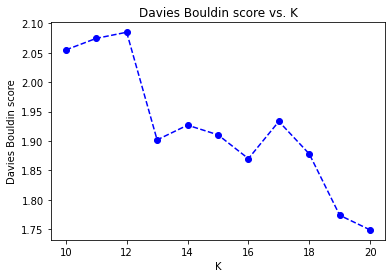

In [ ]:
plt.plot(centers, davies, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K')

Text(0.5, 1.0, 'Sum Squared Error vs. K')

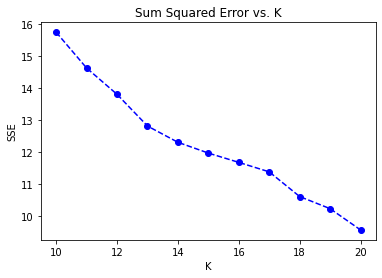

In [ ]:
plt.plot(centers, sse, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('Sum Squared Error vs. K')

Text(0.5, 1.0, 'Silhouette vs. K')

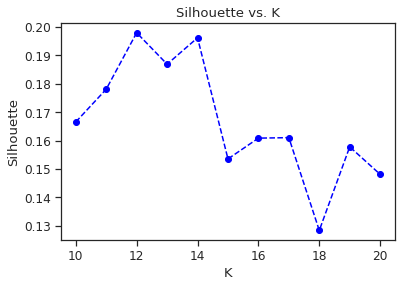

In [ ]:
plt.plot(centers, sil, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Silhouette');
plt.title('Silhouette vs. K')

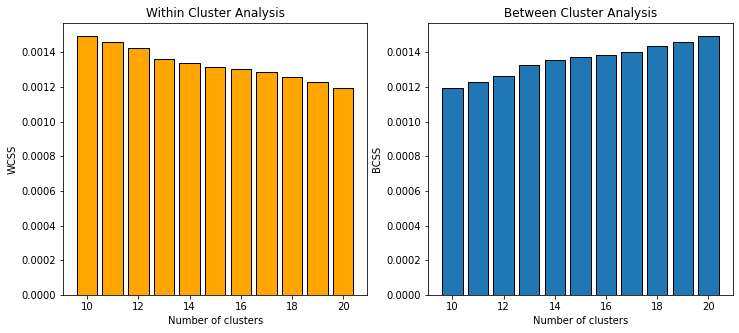

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
## Plot WCSS
n_clusts = range(10, kmax+1)
ax[0].bar(n_clusts, wcss,color='orange', edgecolor='black', linewidth=1)
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('WCSS')
ax[0].set_title('Within Cluster Analysis')
## Plot BCSS 
ax[1].bar(n_clusts, bcss,edgecolor='black')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('BCSS')
ax[1].set_title('Between Cluster Analysis')
plt.show()

In [ ]:
n_clust = 14
km = KMeans(n_clusters = n_clust,n_init=10, max_iter=300, random_state=42)
km.fit(doc2vecs)
clusters = km.labels_.tolist()

In [ ]:
import joblib
joblib.dump(km,"covid_19_kmeans_model_final.joblib")
joblib.dump(modelwv,"covid_19_model_word2vec.joblib")

['covid_19_model_word2vec.joblib']

In [ ]:
projects = { 'Titolo': np.array(df['titolo']), 'Cluster': clusters}
projects_df = pd.DataFrame(projects, index = [clusters] , columns = ['Titolo','Cluster'])
projects_df['Cluster'].value_counts()

6     14
12    13
3     13
10    11
1     11
4      9
2      9
5      7
9      6
13     3
11     3
8      3
7      3
0      2
Name: Cluster, dtype: int64

In [ ]:
import joblib
projects_df = joblib.load("/content/drive/MyDrive/Clustering_COVID19/covid_19_projects_df.joblib")

In [ ]:
projects_df['Cluster'].value_counts()

13    16
3     13
7     12
2     12
6      9
5      8
4      8
1      8
9      7
12     4
11     3
8      3
10     2
0      2
Name: Cluster, dtype: int64

In [ ]:
projects_df

In [ ]:
joblib.dump(projects_df,"covid_19_projects_df.joblib")
joblib.dump(projects_df,"covid_19_clusters.joblib")

['covid_19_clusters.joblib']

In [ ]:
import joblib

In [ ]:
projects_df = joblib.load("covid_19_clusters.joblib")

In [ ]:
print(projects_df)

                                               Titolo  Cluster
9                                       Inter-homines        9
0                             diAry - Digital Arianna        0
12                                          CrownLabs       12
11   ICLUS - Italian Covid-19 Lung Ultrasound project       11
5                                     TELEPSY-COVID19        5
..                                                ...      ...
5   Myrror – Una Piattaforma di Holistic User Mode...        5
9   Proposta di una soluzione di digital contact t...        9
2                       In Silico Trials for Covid-19        2
1   End-to-end learning for semiquantitative ratin...        1
1   Monitoraggio e predizione dell'evoluzione dell...        1

[107 rows x 2 columns]


In [ ]:
def show_hist(k=0):
  k_vec = []
  for ind, project in projects_df.iterrows():
    titolo = project["Titolo"]
    cluster = project["Cluster"]
    if cluster == k:
      for index, item in df.iterrows():
        if item["titolo"] == titolo:
          amb = item["ambito"].split(",")
          for v in amb:
            k_vec.append(v)
  a = np.array(k_vec)
  plt.figure(figsize=(10,5))
  bins = np.arange(len(np.unique(a))+1) - 0.5
  plt.hist(a,edgecolor='black', linewidth=1.2,bins=bins) 
  plt.title("Histogram Cluster "+str(k)) 
  plt.xticks(rotation='vertical')
  plt.show()

In [ ]:
n_clust = 14
for k in range(0,n_clust):
  show_hist(k)

In [ ]:
winners = []
for k in range(0,n_clust):
  best = 0
  best_v = ''
  k_vec = []
  for ind, project in projects_df.iterrows():
    titolo = project["Titolo"]
    cluster = project["Cluster"]
    if cluster == k:
      for index, item in df.iterrows():
        if item["titolo"] == titolo:
          amb = item["ambito"].split(",")
          for v in amb:
            k_vec.append(v)
  (unique, counts)=np.unique(k_vec, return_counts=True)
  frequencies = np.asarray((unique, counts)).T
  for v in frequencies:
    if int(v[1]) > best:
      best = int(v[1])
      best_v = v[0]
  winners.append(best_v)

In [ ]:
f = open("covid_19_clusters.csv","w")
f.write("cluster"+"\t"+"titolo_progetto"+"\t"+"final_cluster"+"initial_cluster"+"\n")

53

In [ ]:
df.loc[df['titolo'] == "CrownLabs"]["ambito"].values[0]

'Distance Learning'

In [ ]:
for index,ele in projects_df.iterrows():
  f.write(str(ele["Cluster"])+"\t"+ele["Titolo"]+"\t"+winners[ele["Cluster"]]+"\t"+df.loc[df['titolo'] == ele["Titolo"]]["ambito"].values[0]+"\n")
f.close()

In [ ]:
winners


In [ ]:
projects_df.loc[projects_df['Cluster'] == 12]

In [ ]:
#change the value in return to set the single color need, in hsl format.
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))

def wordcloud_cluster_byIds(cluId):
    texts = []
    for i in range(0, len(clusters)):
        if clusters[i] == cluId:
            for word in obiettivi2kw[i]:
                texts.append(word)
            #for word in text2kw[i]:
            #    texts.append(word)
    
    wordcloud = WordCloud(max_font_size=60, relative_scaling=.8, width=900, height=400).generate(' '.join(texts))
    
    plt.figure(figsize=(30,20))
    plt.figtext(.5,.8,winners[cluId], fontsize=70, ha='center')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig(str(cluId)+".png")

In [ ]:
for j in range(0,n_clust):
  wordcloud_cluster_byIds(j)

In [ ]:
for l in range(0,n_clust):
  dic = {}
  tot = 0
  for i in range(0, len(clusters)):
    if clusters[i] == l:
      for word in obiettivi2kw[i]:
        try:
          dic[word] = dic[word] +1
        except:
          dic[word] = 1
        tot = tot +1

  print("Cluster "+str(l)+" : "+str(winners[l]))
  dd = {}
  for w in dic.keys():
    val = (dic[w]/tot)
    dd[w]= val
  dd = dict(sorted(dd.items(), key=lambda item: item[1], reverse=True))
  j = 0
  for pp in dd.items():
    print(str(pp[0])+" "+str(pp[1]))
    if j >=25:
      break
    j = j+1
  print("--------------------------------")


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(doc2vecs, 'average', metric='cosine', optimal_ordering=True)

labelList = range(0, len(doc2vecs))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

#Agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=n_clust)
cluster.fit_predict(doc2vecs)

In [ ]:
clusters = cluster.labels_.tolist()
projects = { 'Titolo': np.array(df['titolo']), 'Cluster': clusters}
projects_df = pd.DataFrame(projects, index = [clusters] , columns = ['Titolo','Cluster'])
projects_df['Cluster'].value_counts()

In [ ]:
vf = projects_df.loc[projects_df["Cluster"] == 5]

In [ ]:
vf

In [ ]:
for k in range(0,n_clust):
  show_hist(k)

In [ ]:
winners = []
for k in range(0,n_clust):
  best = 0
  best_v = ''
  k_vec = []
  for ind, project in projects_df.iterrows():
    titolo = project["Titolo"]
    cluster = project["Cluster"]
    if cluster == k:
      for index, item in df.iterrows():
        if item["titolo"] == titolo:
          amb = item["ambito"].split(",")
          for v in amb:
            k_vec.append(v)
  (unique, counts)=np.unique(k_vec, return_counts=True)
  frequencies = np.asarray((unique, counts)).T
  for v in frequencies:
    if int(v[1]) > best:
      best = int(v[1])
      best_v = v[0]
  winners.append(best_v)

In [ ]:
winners

In [ ]:
for j in range(0,n_clust):
  wordcloud_cluster_byIds(j)

In [ ]:
for l in range(0,n_clust):
  dic = {}
  tot = 0
  for i in range(0, len(clusters)):
    if clusters[i] == l:
      for word in obiettivi2kw[i]:
        try:
          dic[word] = dic[word] +1
        except:
          dic[word] = 1
        tot = tot +1

  print("Cluster: "+str(winners[l]))
  dd = {}
  for w in dic.keys():
    val = (dic[w]/tot)
    dd[w]= val
  dd = dict(sorted(dd.items(), key=lambda item: item[1], reverse=True))
  j = 0
  for pp in dd.items():
    print(str(pp[0])+" "+str(pp[1]))
    if j >=25:
      break
    j = j+1
  print("--------------------------------")

In [ ]:
import joblib
joblib.dump(cluster,'AgglomerativeClusterModel_140.joblib')

In [ ]:
# for t-SNE implemention 
from sklearn.manifold import TSNE

In [ ]:
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200

# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(doc2vecs)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, np.array(projects_df['Cluster'].astype(int)).T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("t-SNE_1", "t-SNE_2", "Cluster"))


In [ ]:
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='t-SNE_1', 
           y='t-SNE_2',
           data=tsne_df,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Cluster',
           scatter_kws={"s":300, "alpha":1},
           palette=sns.color_palette("husl", 14))

plt.title('t-SNE Results: COVID-19', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

In [ ]:
joblib.dump(doc2vecs,'/content/drive/MyDrive/Clustering_COVID19/doc2vecs.joblib')

['/content/drive/MyDrive/Clustering_COVID19/doc2vecs.joblib']

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(doc2vecs)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(107, 2)

In [ ]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

In [ ]:
tsne_data = np.vstack((x.T,y.T, np.array(projects_df['Cluster'].astype(int)).T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("pca_1", "pca_2", "Cluster"))

In [ ]:
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='pca_1', 
           y='pca_2',
           data=tsne_df,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Cluster',
           scatter_kws={"s":300, "alpha":0.8},
           palette=sns.color_palette("husl", 14))

plt.title('PCA Results: COVID-19', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')